In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
from scipy.stats import stats
import statsmodels.api as sm
import os

In [2]:
df=pd.read_csv("Data/loans_income.csv")
df

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [3]:
loans_income=np.array(pd.read_csv("Data/loans_income.csv"))

In [4]:
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [5]:
loans_income=np.array([item for sublist in loans_income for item in sublist])
loans_income

array([ 67000,  52000, 100000, ...,  50000,  82000,  70000], dtype=int64)

In [7]:
def bootstrap(l,R):
    n=len(loans_income)
    #No. of Bootstrap samples
    means_of_boo_samples=[]
    for reps in range(R):
        #step no 1&2
        boot_sample=np.random.choice(loans_income,size=n)
        #step 3
        means_of_boo_samples.append(round(np.mean(boot_sample),3))
    return means_of_boo_samples
bootstrap(loans_income,5)

[69053.674, 68843.379, 68991.026, 68921.398, 68635.626]

In [9]:

np.std(bootstrap(loans_income,100))

141.2773392739527

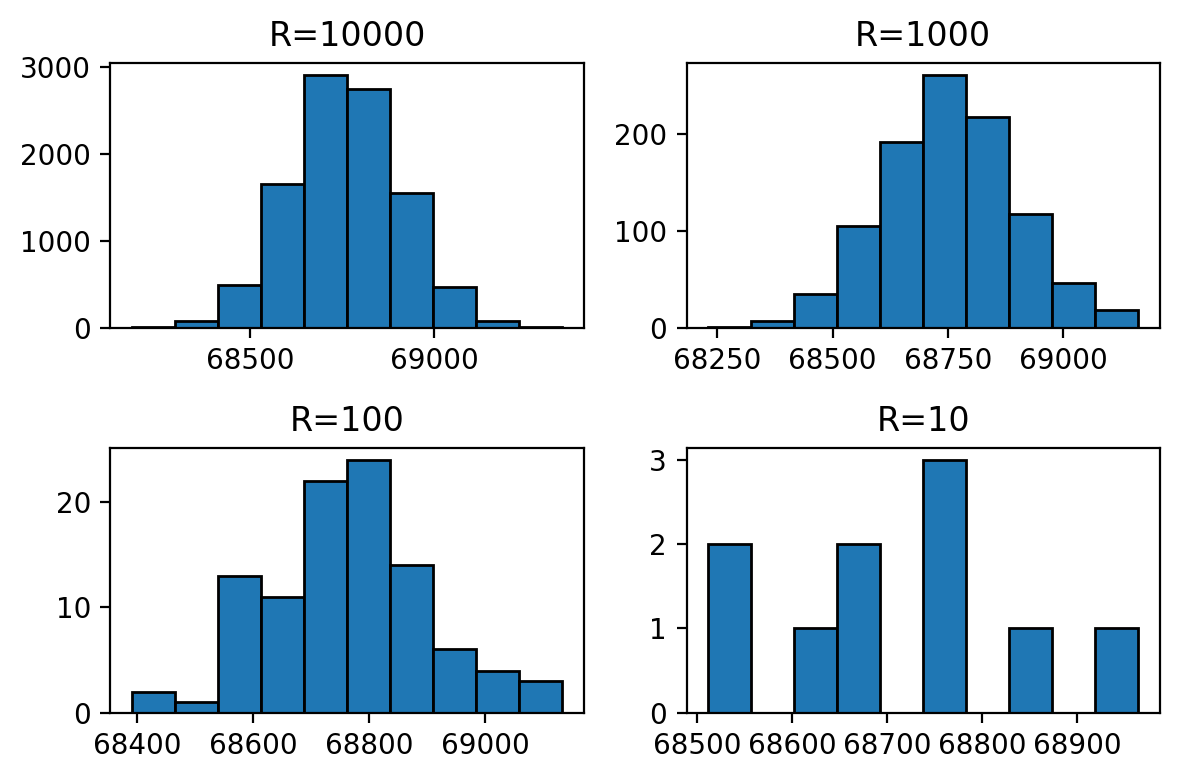

In [10]:
plt.figure(dpi=200)

plt.subplot(221)
plt.title("R=10000")
plt.hist(bootstrap(loans_income,10000),edgecolor="k")


plt.subplot(222)
plt.title("R=1000")
plt.hist(bootstrap(loans_income,1000),edgecolor="k")


plt.subplot(223)
plt.title("R=100")
plt.hist(bootstrap(loans_income,100),edgecolor="k")

plt.subplot(224)
plt.title("R=10")
plt.hist(bootstrap(loans_income,10),edgecolor="k")
plt.tight_layout()

In [11]:
data=bootstrap(loans_income,1000)
lower_lim,upper_lim=np.percentile(data,2.5),np.percentile(data,95)
print("Lower Limit:",lower_lim)
print("Upper Limit:",upper_lim)

Lower Limit: 68482.73582500001
Upper Limit: 69000.88955


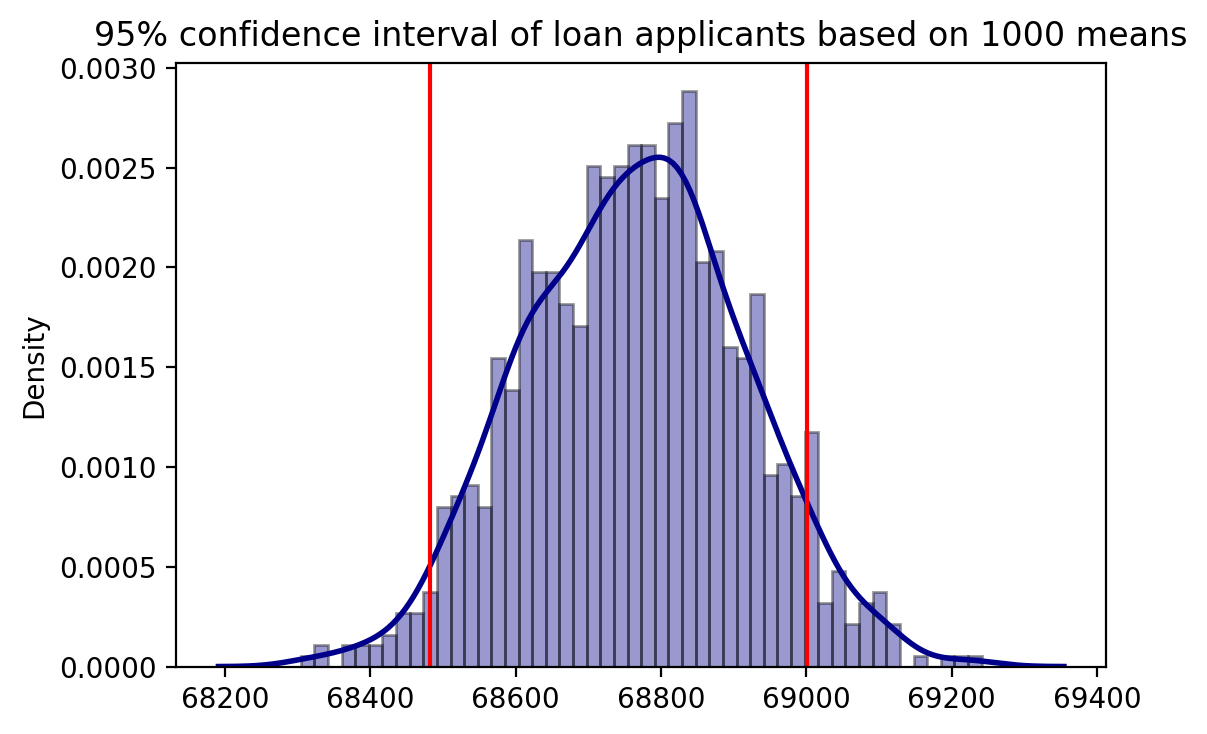

In [15]:
plt.figure(dpi=200)
plt.title("95% confidence interval of loan applicants based on 1000 means")
sns.distplot(bootstrap(loans_income,1000),hist=True,kde=True,
            color='darkblue', bins=50,
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})
            
plt.axvline(x=lower_lim,color='red')
plt.axvline(x=upper_lim,color='red')